Best option 2

R2 is positive, regression is best, options 2 the better from ANN 
https://colab.research.google.com/drive/1NYHliaYjTdc58zi4qrtUlgM9YOlBqjvV#scrollTo=dtzIUCtY3O69&line=4&uniqifier=1


In [1]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() #upload all the files from Q1 Master Thesis SWE

Saving [swe]_[size]_[monthly]_[vw].xlsx to [swe]_[size]_[monthly]_[vw].xlsx
Saving [swe]_[value]_[monthly]_[vw].xlsx to [swe]_[value]_[monthly]_[vw].xlsx
Saving ATLAS_COPCO_B_PX_LAST.xlsx to ATLAS_COPCO_B_PX_LAST.xlsx
Saving INVEB_PX_LAST.xlsx to INVEB_PX_LAST.xlsx
Saving market_returns.csv to market_returns.csv
Saving Monthly_inputs_sweden_after_spline.xlsx to Monthly_inputs_sweden_after_spline.xlsx
Saving Risk Free sweden.xlsx to Risk Free sweden.xlsx
Saving SWE_Q1_additional.xlsx to SWE_Q1_additional.xlsx
Saving Sweden 10Y bond.xlsx to Sweden 10Y bond.xlsx


In [2]:
# 2.1 Fama-French Three Factors Model Data

# sweway, INVEB, returns
INVEB_monthly = pd.read_excel("INVEB_PX_LAST.xlsx") # read data

INVEB_monthly_array = INVEB_monthly.to_numpy() # important in order to be able to process data
INVEB_monthly_returns = INVEB_monthly_array[:,2] 
INVEB_returns = INVEB_monthly_returns[144:374] # start 11/2001, end 2020-12-31


print(INVEB_monthly_array[144:374])
INVEB_returns.shape


[[Timestamp('2001-11-30 00:00:00') 27.625 0.0625 nan nan]
 [Timestamp('2001-12-31 00:00:00') 28.625 0.03619909502 nan nan]
 [Timestamp('2002-01-31 00:00:00') 27.25 -0.02183406114 nan nan]
 ...
 [Timestamp('2020-10-30 00:00:00') 133.6 -0.08960817717 nan nan]
 [Timestamp('2020-11-30 00:00:00') 148.4 0.1107784431 nan nan]
 [Timestamp('2020-12-31 00:00:00') 149.8 0.009433962264 nan nan]]


(230,)

In [3]:
# 2.2 Fama-French Three Factors Model Data

# sweway, Size, SMB
swe_size_monthly_vw = pd.read_excel('[swe]_[size]_[monthly]_[vw].xlsx') # read data
swe_size_monthly_vw_array = swe_size_monthly_vw.to_numpy() # important in order to be able to process data

swe_size_monthly_vw_returns = swe_size_monthly_vw_array[:,6] 
SMB_returns_swe = swe_size_monthly_vw_returns [189:419] # for t-1 for 10/2001-11/2020

print(swe_size_monthly_vw_array[189:419])
SMB_returns_swe.shape

[['swe' 'size' 'monthly' ... 5.0 Timestamp('2001-10-31 00:00:00')
  0.0370879842640385]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2001-11-30 00:00:00')
  0.0460738742381095]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2001-12-31 00:00:00')
  -0.0095939169258809]
 ...
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2020-09-30 00:00:00')
  0.0017058585310293]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2020-10-31 00:00:00')
  -0.0006270020634473]
 ['swe' 'size' 'monthly' ... 5.0 Timestamp('2020-11-30 00:00:00')
  -0.0060724112610462]]


(230,)

In [4]:
# 2.3 Fama-French Three Factors Model Data

# sweway, Value, HML
swe_value_monthly_vw = pd.read_excel('[swe]_[value]_[monthly]_[vw].xlsx') # read data
swe_value_monthly_vw_array = swe_value_monthly_vw.to_numpy() # important in order to be able to process data

swe_value_monthly_vw_returns = swe_value_monthly_vw_array[:,6] 
HML_returns_swe = swe_value_monthly_vw_returns[177:407] # for t-1 for 10/2001-11/2020

print(swe_value_monthly_vw_array[177:407])
HML_returns_swe.shape

[['swe' 'value' 'monthly' ... 18.0 Timestamp('2001-10-31 00:00:00')
  -0.0317249048754111]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2001-11-30 00:00:00')
  -0.0527693857353054]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2001-12-31 00:00:00')
  0.0227720575118573]
 ...
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2020-09-30 00:00:00')
  0.0275355864686321]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2020-10-31 00:00:00')
  -0.0067784171285996]
 ['swe' 'value' 'monthly' ... 18.0 Timestamp('2020-11-30 00:00:00')
  0.0128404585745397]]


(230,)

In [5]:
additional_monthly = pd.read_excel("SWE_Q1_additional.xlsx") # read data

additional_monthly_array = additional_monthly.to_numpy() # important in order to be able to process data
oil_monthly = additional_monthly_array[3:233,2]
usd_sek_monthly = additional_monthly_array[3:233,1]
div_payout_monthly = additional_monthly_array[0:230,3] # t-4 months start Jul 2001
div_payout_monthly.shape

(230,)

In [6]:
#@title
# 2.4 Fama-French Three Factors Model Data

# sweden, Historical risk-free rate
risk_free_swe = pd.read_excel('Risk Free sweden.xlsx') # read data
risk_free_swe_array = risk_free_swe.to_numpy() # important in order to be able to process data

#risk_free_swe_returns = risk_free_swe_array[:,6]/100 
#rf_swe = risk_free_swe_returns[3:327]
rf_swe_t1 = risk_free_swe_array[95:325,1]/100 # risk free t-1
rf_swe = risk_free_swe_array[96:326,1]/100

print(risk_free_swe[96:326])
rf_swe.shape

             Period  Annualized  Average
96    2001 November    0.366838   3.7500
97    2001 December    0.366838   3.7500
98     2002 January    0.366838   3.7500
99    2002 February    0.366838   3.7500
100      2002 March    0.376841   3.8375
..              ...         ...      ...
321     2020 August    0.000000   0.0000
322  2020 September    0.000000   0.0000
323    2020 October    0.000000   0.0000
324   2020 November    0.000000   0.0000
325   2020 December    0.000000   0.0000

[230 rows x 3 columns]


(230,)

In [7]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#help(stats.linregress)

In [8]:
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

### EXCESS RETURNS

In [9]:
excess_returns_swe = INVEB_returns - rf_swe
print(excess_returns_swe)

[0.058831620588 0.032530715608 -0.025502440552 0.028441712328
 0.031787146634 -0.09408487961100001 -0.13632539835500002 -0.129249926655
 -0.227852411155 -0.068249926655 -0.229890952255 0.165727998245
 0.15624003401800002 -0.158251087589 -0.018091456332 -0.030198991652
 0.019513864759 0.092924908166 -0.022078156034000002 0.11127538730499999
 0.057185030766000004 0.10226319356500001 -0.060969676715 0.082695801695
 -0.024004087565000002 0.012023024015000001 0.13771225366499998
 0.023567655440999997 -0.046620033893000005 0.024577604064000003
 -0.024368442839 0.014661208420999999 -0.018021396338999997 0.008060722621
 0.011258291291 0.014341234581000001 0.058476928170999996 0.010162443771
 0.057381662140999996 0.104178235571 -0.012176298428999999 -0.027991614599
 0.07078854641099999 0.060968482448999994 0.093008138109 -0.044434932811
 0.084254101059 -0.026227750091 0.041221706959 0.13336239306900002
 -0.019373420840999998 0.024745756089 0.034816432501 0.015854240391000002
 -0.123341381929 0.

### MARKET RETURNS

In [10]:
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for sweden
# Note: we need to start from 12/1993 for sweden 
mkt_ret_swe = mkt_ret_array[25837:26067] # 324 datapoints for t-1
print(mkt_ret_swe)


[['SWE' '2001-10-31' 300 ... 0.1021543086 0.0679890572 0.0962918628]
 ['SWE' '2001-11-30' 298 ... 0.1684758082 0.1271755271 0.1652719566]
 ['SWE' '2001-12-31' 301 ... 0.004299921 0.0228613685 0.002815921]
 ...
 ['SWE' '2020-09-30' 671 ... 0.0045223882 0.0041205846 0.0023117938]
 ['SWE' '2020-10-31' 674 ... -0.062888563 -0.050552926 -0.062808254]
 ['SWE' '2020-11-30' 680 ... 0.1155726457 0.1538268339 0.1155066457]]


In [11]:
mkt_ret_swe_df = pd.DataFrame(mkt_ret_swe)
#creating the excess market returns
y_swe = mkt_ret_swe[:,7] - rf_swe_t1 # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_swe) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_swe = np.asarray(y_swe).astype(np.float32)

print(R_m_swe)
print(len(R_m_swe))

[ 0.06654213  0.12528753  0.02067699 -0.07635302  0.01258544  0.03738012
 -0.07416232 -0.01235535 -0.01961683 -0.13889325 -0.00687365 -0.15789807
  0.13338016  0.14119957 -0.09709372 -0.02090644 -0.00482072 -0.03240991
  0.19281171  0.05037522  0.00725389  0.04073547  0.01153413  0.05515436
  0.0674081   0.03713096  0.08159252  0.03204791  0.03150042 -0.02582488
  0.00069264  0.01314958  0.02380463 -0.04219932  0.01941575  0.07503094
  0.02132173  0.12887599  0.02735817 -0.05463094  0.06812593 -0.02977686
 -0.027297    0.02195667 -0.01510686  0.05819682  0.00666732  0.03570729
 -0.04844129  0.02196841  0.07364767  0.05971373 -0.00590057  0.08218174
  0.0614282  -0.05895948  0.00160617 -0.01775797  0.03897924  0.03859989
  0.05762885  0.04828795  0.08682173  0.0099452  -0.03460331  0.05533104
  0.11877932 -0.01109839 -0.0209748   0.00238293 -0.05224245  0.06016694
 -0.01283639 -0.07060797 -0.03358769 -0.12210207  0.06699754  0.0228117
  0.02887817  0.01766143 -0.15035641 -0.01479269 -0.

### REGRESSION

In [12]:
# df = pd.DataFrame(market_returns_swe,HML_returns_swe,SMB_returns_swe)
# print(df)
X1 = R_m_swe
X2 = HML_returns_swe
X3 = SMB_returns_swe
X4 = usd_sek_monthly 
X5 = oil_monthly 
X6 = div_payout_monthly

# regressors - that which regresses, or causes regression
X = R_m_swe
X_df = pd.DataFrame(X) # This represents output or column: # R_m_swe
X_df.columns = ['X1 (R_m_swe)']
X_df.insert(1, 'X2 (HML_returns_swe)', HML_returns_swe, True)
X_df.insert(1, 'X3 (SMB_returns_swe)', SMB_returns_swe, True)
X_df.insert(1, 'X4 (usd_sek_monthly)', usd_sek_monthly, True)
X_df.insert(1, 'X5 (oil_monthly)', oil_monthly, True)
X_df.insert(1, 'X6 (div_payout_monthly)', div_payout_monthly, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_swe



     X1 (R_m_swe) X6 (div_payout_monthly) X5 (oil_monthly)  \
0        0.066542               -0.288303            20.54   
1        0.125288               -0.496522             18.8   
2        0.020677               -0.382653            18.71   
3       -0.076353                 0.13236            19.42   
4        0.012585                 0.77224            20.28   
..            ...                     ...              ...   
225      0.112534               -0.029445            43.24   
226      0.051825               -0.001893            44.74   
227      0.004218                 0.02676            40.91   
228     -0.050487                0.042607            40.19   
229      0.153893                0.051292            42.69   

    X4 (usd_sek_monthly) X3 (SMB_returns_swe) X2 (HML_returns_swe)  
0                10.6662             0.037088            -0.031725  
1                10.6535             0.046074            -0.052769  
2                10.4534            -0.009594   

In [13]:
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(230, 6)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size = 0.25, random_state = 0,shuffle=False)

In [16]:
#mlr = LinearRegression()  
#mlr.fit(X_df, Y)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [17]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  0.116423654783941
Coefficients: [-2.90629159e-02 -1.49498260e-03 -2.37676802e-04 -1.21154917e-02
  2.92360036e-01 -1.95871148e-01]


In [18]:
# rf_swe
# INVEB_returns
# HML_returns_swe
# SMB_returns_swe

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

# compute with formulas from the theory
test_prediction_FF3 = mlr.predict(x_test)
SS_Residual = sum((y_test-test_prediction_FF3)**2)   
SS_Total = sum((y_test)**2)     

# r_squared
r_squared_FF3 = 1 - (float(SS_Residual))/SS_Total
print("R2 =", r_squared_FF3)

# adjusted_r_squared 
#adjusted_r_squared = 1 - (1-r_squared_FF3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#print(adjusted_r_squared)

# Mean squared error
MSE_reg = mean_squared_error(y_test,test_prediction_FF3)
# Mean absolute error
MAE_reg = mean_absolute_error(y_test,test_prediction_FF3)
# Root mean squared error
RMSE = mean_squared_error(y_test,test_prediction_FF3)**0.5

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE )

R2 = -0.05663596840995444
MSE = 0.0028603276194885388
MAE = 0.045395305596645556
Root MSE = 0.053482030809315184


In [20]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)
scaler = MinMaxScaler()

In [21]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(x_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler()

In [22]:
x_train = scaler.transform(x_train) # we just scale the test training data set to be between 0 and 1
x_test = scaler.transform(x_test) # we just scale the test data set to be between 0 and 1

In [23]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

x_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[6.44427748e-01, 7.48867330e-01, 1.60512236e-02, 9.99111168e-01,
        6.93845720e-01, 3.08950789e-01],
       [7.56765339e-01, 7.37547027e-01, 7.89404438e-04, 9.96423508e-01,
        7.54529281e-01, 2.34499443e-01],
       [5.56720797e-01, 7.43737761e-01, 0.00000000e+00, 9.54076990e-01,
        3.78593246e-01, 5.01750610e-01],
       ...,
       [5.35413359e-01, 7.55451625e-01, 2.24190860e-01, 5.88661037e-01,
        6.41435579e-01, 3.66342162e-01],
       [5.10688210e-01, 7.60458521e-01, 1.69283396e-01, 5.29363215e-01,
        7.39024411e-01, 3.90312041e-01],
       [3.58350204e-01, 7.66926961e-01, 1.05166213e-01, 5.57382600e-01,
        3.34722445e-01, 4.70820147e-01]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# The two parameter calls that we need to be aware of is "units" and "activation function".
# "units" is just another word for neurons. Actually, it means: How many neurons are actually gonna be in this layer.
### model = Sequential([Dense(368,activation='relu'), # open your call for Sequential... you actually pass in a list of those layers.
                    ### Dense(368,activation='relu'),
                    ### Dense(1)]) # since this is my last output layer, I dont want any activation function

In [26]:
# The other way we can do this is the following. This is going to be our preferred method.
### model = Sequential() # creating an empty sequential model

# More easy to edit now, if we for example want to delete a layer or edit it.
# Hidden layers, added one-by-one, in this case 3 layers, with 368 neurons each, using "relu"

### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 

# Output later

### model.add(Dense(1)) # since this is my last output layer, I dont want any activation function

# Our very last layer, will be just be 1 final output node.
# So, the final output layer is actually pretty important.
# That is going to be determined by out actual data in our actual situation what we are trying to predict.

# Recall, with this particular data set, we are predicting a single numerical return value.
# So, what I want in my very last layer is to be a single neuron that produces some sort of price.
# So, it is going to predict a return of maybe let's say 1.32% (0.00132) etc.
# That is why I am chosing that final layer to just have Dense(1), where it is just going to predict the return.

# So, that final output is then going to be measured against the true return, and we will do that with some sort of loss function.
# And that is where this final line come into play, which is compiling your model:

### model.compile() # The main parameter calls we will look at is the "optimizer" and the "loss" function

# The "optimizer" is essentially just asking you how you actuallt want to perform this GRADIENT DESCENT.
# So, do you want to use "optimizer='rmsprop'", or other methods of optimization, such as the "adam" optimizer?

# In the "loss" parameter, that string code is going to change dependent on what you are actually trying to accomplish here.
# For a mean squared error regression problem: loss = 'mse'
# We use this as our loss-functionality because our LABEL is a continous value.
# This makes sense, since we are actually taking the Mean-Squared-Errors of our predicted values against the true values.
# And we are trying to minimize that through our "optimizer".

In [27]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
x_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(172, 6)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [29]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))

#model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Aswell as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse')

# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.

In [30]:
x_test = np.asarray(x_test).astype('float32') #command to fix ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')


In [31]:
# Now we are ready to train the model or fit the model to the training data.

### model.fit(X_train, y_train, epochs=30) # verbose=1
# help(model.fit)

# We can also pass in the validation data here.
# Passing in validation data means that after each epoch of training on the training data,
# we will quickly run the testa data and check our loss on the test data.
# So, that way we can keep tracking on how well we are performing, not just on our training data,
# but also on the test data.
# Keep in mind, this testa data will not actually affect weights and biases of our network.
# So, Keras is not going to update our model based of the test data for validation data.
# Instead, it will only use the training data as it is updating the weights and biases, and continue to
# essentially check how well it is doing, on not just the training data, but also on the validation data.

model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop]) # 

# For validation_data=(X_test,y_test), TensorFlow might complain if it is not a numerical array.
# Because it can not work with panda series or dataframe.

# So again, we are training on X_train and Y_train, but as we go along, we want to be checking against our test set.
# And that will give us some nice plots to basically realize whether we are overfitting.

# If we have a large data set, we are going to feed in our data in batches.
# It is very typical to do batch sizes in powers of 2, so 64,128,256 etc.
# The smaller the batch size, the longer training is going to take but the less likely you are going to be overfit to your data,
# because you are not passing in your entire training set at once.
# Instead, you are focusing on these smaller batches.

# And we can choose an arbitrary number of epochs, because we dont have any early stopping mechanisms yet.
# We will learn about those later on in the course.

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 0.1027 - val_loss: 0.0768
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0494 - val_loss: 0.0378
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.0190
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0126 - val_loss: 0.0110
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0074
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 11/100
9/9 [==========

In [32]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.102678,0.076849
1,0.049406,0.037783
2,0.023239,0.018973
3,0.012635,0.010958
4,0.008521,0.007389
5,0.006660,0.005725
6,0.005908,0.004780
7,0.005445,0.004298
8,0.005201,0.004056
9,0.005122,0.003864


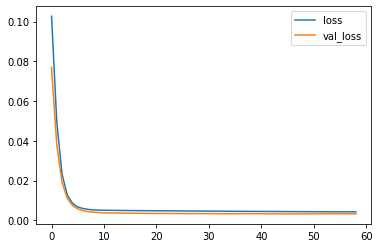

In [33]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

In [34]:
model.evaluate(x_test, y_test, verbose=0)
model.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN = model.predict(x_test)
test_predictions_ANN = pd.Series(test_predictions_ANN.reshape(58,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

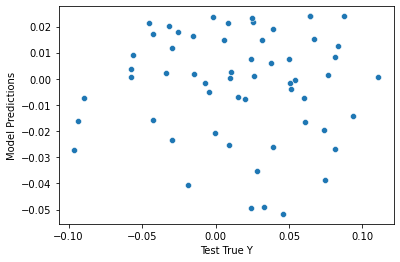

In [35]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score


In [37]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.048044793

In [38]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.0032325196

In [39]:
# Root mean squared error
mean_squared_error(y_test, test_predictions_ANN)**0.5

0.056855251366878856

In [40]:
explained_variance_score(y_test, test_predictions_ANN)

-0.1802833080291748

In [41]:
# Mean squared error
MSE_ANN = mean_squared_error(y_test, test_predictions_ANN)
# Mean absolute error
MAE_ANN = mean_absolute_error(y_test, test_predictions_ANN)
# Root mean squared error
RMSE_ANN = mean_squared_error(y_test, test_predictions_ANN)**0.5

In [42]:
SS_Residual = sum((y_test-test_predictions_ANN)**2)   
SS_Total = sum((y_test)**2)     

# r_squared
r_squared_ANN = 1 - (float(SS_Residual))/SS_Total
print(r_squared_ANN)
print(MSE_ANN)
print(MAE_ANN)
print(RMSE_ANN)

-0.19412777573338102
0.0032325196
0.048044793
0.056855251366878856


In [43]:
print(r_squared_FF3) # keep since we compare with ANN above
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE )

-0.05663596840995444
MSE = 0.0028603276194885388
MAE = 0.045395305596645556
Root MSE = 0.053482030809315184


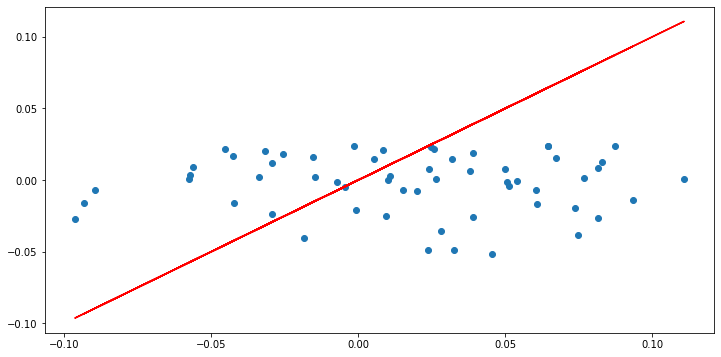

In [44]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions_ANN)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to answer, or what problem we are trying to solve.

# Second option: Small hidden layer
 



In [45]:
model_2 = Sequential()

model_2.add(Dense(6,activation='relu'))
model_2.add(Dense(1,activation='relu')) 
#model.add(Dense(56,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [46]:
model_2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop])

Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 0.0321 - val_loss: 0.0483
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.0326
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0149 - val_loss: 0.0215
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.0140
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.0094
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 11/100
9/9 [==========

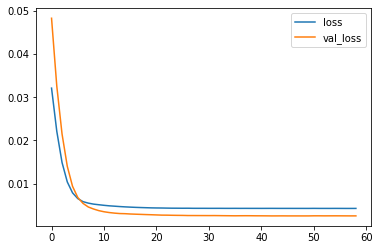

In [47]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [118]:
model_2.evaluate(x_test, y_test, verbose=0)
model_2.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN2 = model_2.predict(x_test)
test_predictions_ANN2 = pd.Series(test_predictions_ANN2.reshape(58,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN2],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [119]:
SS_Residual_2 = sum((y_test-test_predictions_ANN2)**2)   
SS_Total_2 = sum((y_test)**2)     

# r_squared
r_squared_ANN_2 = 1 - (SS_Residual_2/SS_Total_2)
print(r_squared_ANN_2)

0.07079741284882046


In [120]:
MAE_ANN2 = mean_absolute_error(y_test,test_predictions_ANN2)
MSE_ANN2 = mean_squared_error(y_test,test_predictions_ANN2)
RMSE_ANN2 = mean_squared_error(y_test,test_predictions_ANN2)**0.5


print(MSE_ANN2)
print(MAE_ANN2)
print(RMSE_ANN2)

0.0025153637
0.041104626
0.050153402076064925


In [121]:
print(r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE )

-0.05663596840995444
MSE = 0.0028603276194885388
MAE = 0.045395305596645556
Root MSE = 0.053482030809315184


# **Option 3:** **Dropout**

In [52]:
#@title
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [53]:
#@title
model_3 = Sequential()

model_3.add(Dense(6,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

model_3.add(Dense(3,activation='relu')) 
model_3.add(Dropout(0.01)) # half of (25%) these neurons will be turned of randomly during each batch

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [54]:
#@title
model_3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop])

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 0.2860 - val_loss: 0.1072
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1941 - val_loss: 0.0667
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1229 - val_loss: 0.0393
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0646 - val_loss: 0.0222
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - val_loss: 0.0123
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.0072
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0298 - val_loss: 0.0047
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0038
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0211 - val_loss: 0.0035
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0171 - val_loss: 0.0034
Epoch 11/100
9/9 [==========

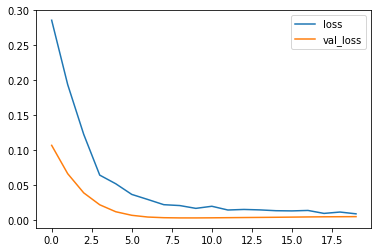

In [55]:
#@title
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [56]:
#@title
model_3.evaluate(x_test, y_test, verbose=0)
model_3.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN3 = model_3.predict(x_test)
test_predictions_ANN3 = pd.Series(test_predictions_ANN3.reshape(58,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN3],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [57]:
SS_Residual_3 = sum((y_test-test_predictions_ANN3)**2)   
SS_Total_3 = sum((y_test)**2)     

# r_squared
r_squared_ANN_3 = 1 - (SS_Residual_3/SS_Total_3)
print(r_squared_ANN_3)

-0.945441157442986


In [58]:
MAE_ANN3 = mean_absolute_error(y_test,test_predictions_ANN3)
MSE_ANN3 = mean_squared_error(y_test,test_predictions_ANN3)
RMSE_ANN3 = mean_squared_error(y_test,test_predictions_ANN3)**0.5


print(r_squared_ANN_3)
print(MSE_ANN3)
print(MAE_ANN3)
print(RMSE_ANN3)

-0.945441157442986
0.0052663344
0.061589707
0.07256951423191191


In [59]:
print(r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE )

-0.05663596840995444
MSE = 0.0028603276194885388
MAE = 0.045395305596645556
Root MSE = 0.053482030809315184


# Diebold Mariano Function. Reference in the comments

In [78]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

# Diebold Mariano code and results

In [61]:
# Replaced with our values
# Comparison between FF3, ANN1
actual_lst = y_test
pred1_lst = test_prediction_FF3
pred2_lst = test_predictions_ANN
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.87701777392107, p_value=0.06563696439869723)


In [129]:
#test_predictions_ANN2 = test_predictions_ANN2.to_numpy()
test_predictions_ANN2

0     0.014744
1     0.014744
2     0.014744
3     0.014744
4     0.014744
5     0.014744
6     0.014744
7     0.014744
8    -0.006675
9     0.008872
10    0.014744
11    0.014744
12    0.014744
13    0.009660
14    0.014744
15    0.014744
16    0.014744
17    0.014744
18    0.014744
19    0.014744
20    0.014744
21    0.014744
22    0.014744
23    0.014744
24    0.014744
25    0.014744
26    0.014744
27    0.014744
28    0.014744
29    0.014744
30    0.014744
31    0.014744
32    0.014744
33    0.014744
34    0.014744
35    0.014744
36    0.014744
37    0.014744
38    0.014744
39    0.014744
40    0.014744
41    0.014744
42   -0.002638
43    0.014744
44    0.013379
45    0.014744
46    0.014744
47    0.014744
48    0.014744
49   -0.016054
50    0.012992
51    0.009319
52    0.014744
53    0.014744
54    0.014744
55   -0.000008
56    0.007946
57    0.008429
dtype: float32

In [116]:
# Replaced with our values
# Comparison between FF3, ANN2
actual_lst = y_test
pred1_lst = test_prediction_FF3
pred2_lst = test_predictions_ANN2
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

SyntaxError: ignored

In [101]:
# Replaced with our values
# Comparison between FF3, ANN3
actual_lst = y_test
pred1_lst = test_prediction_FF3
pred2_lst = test_predictions_ANN3
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-4.870034391391915, p_value=9.241124335068605e-06)


In [63]:
print(r_squared_ANN)
print(r_squared_ANN_2)
print(r_squared_ANN_3)
print(r_squared_FF3)

-0.19412777573338102
0.07079741284882046
-0.945441157442986
-0.05663596840995444
